In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.decomposition import PCA as sklearnPCA

In [2]:
def generate_data(LICZBA, WYMIAR, L_KLAS, ZABURZENIE):
    for i in range(L_KLAS):

        # mu_vec - współrzędne wokół których powinny się rozmieścić punkty
        # cov_mat - jak bardzo powinny być rozrzucone względem każdego wymiaru po kolei

        mu_vec2 = np.ones((WYMIAR,), dtype=np.int)
        mu_vec2 = np.multiply(mu_vec2, i*2)

        cov_mat2 = np.zeros((WYMIAR, WYMIAR), int)
        np.fill_diagonal(cov_mat2, 1)
        zabu = np.random.randint(ZABURZENIE, size=(WYMIAR, 1))
        cov_mat2 = np.multiply(cov_mat2, np.add(zabu,1))

        class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, LICZBA).T
        assert class2_sample.shape == (WYMIAR,LICZBA), "The matrix has not the right dimensions"

        # konkatenacja danych
        if(i == 0):
            all_samples = class2_sample
        else:
            all_samples = np.concatenate((all_samples, class2_sample), axis=1)

    #print(all_samples.shape)
    assert all_samples.shape == (WYMIAR,LICZBA*L_KLAS), "The output matrix has not the right dimensions"

    return all_samples.T

In [3]:
# PCA 2D
def plot_data_2d(data):
    sklearn_pca = sklearnPCA(n_components=2)
    sklearn_transf = sklearn_pca.fit_transform(data)

    plt.plot(sklearn_transf[0:LICZBA,0],sklearn_transf[0:LICZBA,1], 
             'o', markersize=7, color='blue', alpha=0.5, label='class1')
    plt.plot(sklearn_transf[LICZBA:LICZBA*2,0], sklearn_transf[LICZBA:LICZBA*2,1], 
             '^', markersize=7, color='red', alpha=0.5, label='class2')

    plt.xlabel('x_values')
    plt.ylabel('y_values')
    plt.xlim([-15,15])
    plt.ylim([-15,15])
    plt.legend()
    plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

    plt.show()

In [4]:
# PCA 3D
def plot_data_3d(data):
    sklearn_pca = sklearnPCA(n_components=3)
    sklearn_transf = sklearn_pca.fit_transform(data)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    plt.rcParams['legend.fontsize'] = 10
    ax.plot(sklearn_transf[0:LICZBA,0],sklearn_transf[0:LICZBA,1],sklearn_transf[0:LICZBA,2], 
            'o', markersize=8, color='blue', alpha=0.5, label='class1')
    ax.plot(sklearn_transf[LICZBA:LICZBA*2,0],sklearn_transf[LICZBA:LICZBA*2,1],sklearn_transf[LICZBA:LICZBA*2,2], 
            '^', markersize=8, alpha=0.5, color='red', label='class2')

    plt.title('Samples for class 1 and class 2')
    ax.legend(loc='upper right')

    plt.show()

In [5]:
LICZBA = 100
WYMIAR = 10
L_KLAS = 2
ZABURZENIE = 3

data = generate_data(LICZBA, WYMIAR, L_KLAS, ZABURZENIE)

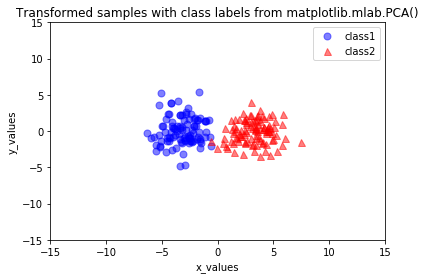

In [6]:
plot_data_2d(data)

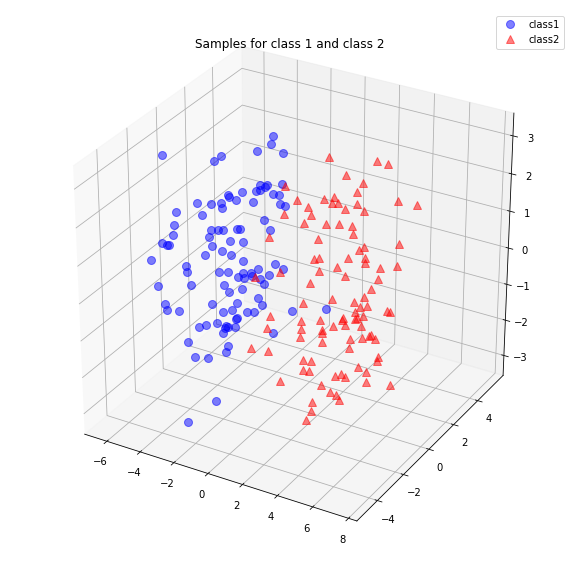

In [7]:
plot_data_3d(data)